<a href="https://colab.research.google.com/github/TheAllBlueChevy/UST-Deep-Learning-2026/blob/main/HWK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HWK3**

# 0) Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


np.random.seed(42)
tf.random.set_seed(42)

# 1) Data Set Up

In [13]:
# Creating Training Sets in Increments of 6000
training = [6000 * s for s in range(1, 11)]
training

[6000, 12000, 18000, 24000, 30000, 36000, 42000, 48000, 54000, 60000]

In [18]:
# Load the MNIST data into Training and Testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Transform X Train and X Test into Binary
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# CNN Model
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test.reshape(-1, 28, 28, 1)

# FCN Model
X_train_fcn = X_train.reshape(-1, 28, 28)
X_test_fcn  = X_test.reshape(-1, 28, 28)

# Classes
classes = 10

# 2. Model Builders

In [19]:
# FCN
def fcn_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [20]:
# CNN
def cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3) Training Loop for FCN and CNN

In [24]:
EPOCHS = 5
BATCH = 128

results = []

for n in training:
    print(f"\nTraining Size: {n}")

    idx = np.random.choice(len(X_train_fcn), size=n, replace=False)

    # Fully Connected Network
    fcn = fcn_model()
    fcn.fit(
        X_train_fcn[idx], y_train[idx],
        epochs=EPOCHS,
        batch_size=BATCH,
        verbose=0,
        validation_split=0.1
    )
    fcn_test_acc = fcn.evaluate(X_test_fcn, y_test, verbose=0)[1]

    # Convolutional Neural Network
    cnn = cnn_model()
    cnn.fit(
        X_train_cnn[idx], y_train[idx],
        epochs=EPOCHS,
        batch_size=BATCH,
        verbose=0,
        validation_split=0.1
    )
    cnn_test_acc = cnn.evaluate(X_test_cnn, y_test, verbose=0)[1]

    results.append({
        "train_size": n,
        "fcn_test_acc": float(fcn_test_acc),
        "cnn_test_acc": float(cnn_test_acc),
    })

df = pd.DataFrame(results)
df



Training Size: 6000

Training Size: 12000

Training Size: 18000

Training Size: 24000

Training Size: 30000

Training Size: 36000

Training Size: 42000

Training Size: 48000

Training Size: 54000

Training Size: 60000


,train_size,fcn_test_acc,cnn_test_acc
0,6000,0.9414,0.9516
1,12000,0.9568,0.9728
2,18000,0.9661,0.9774
3,24000,0.9687,0.9798
4,30000,0.9753,0.9822
5,36000,0.9762,0.9825
6,42000,0.9736,0.9830
7,48000,0.9781,0.9841
8,54000,0.9767,0.9863
9,60000,0.9778,0.9843


# 4) Plot the Results & Plateu Detection

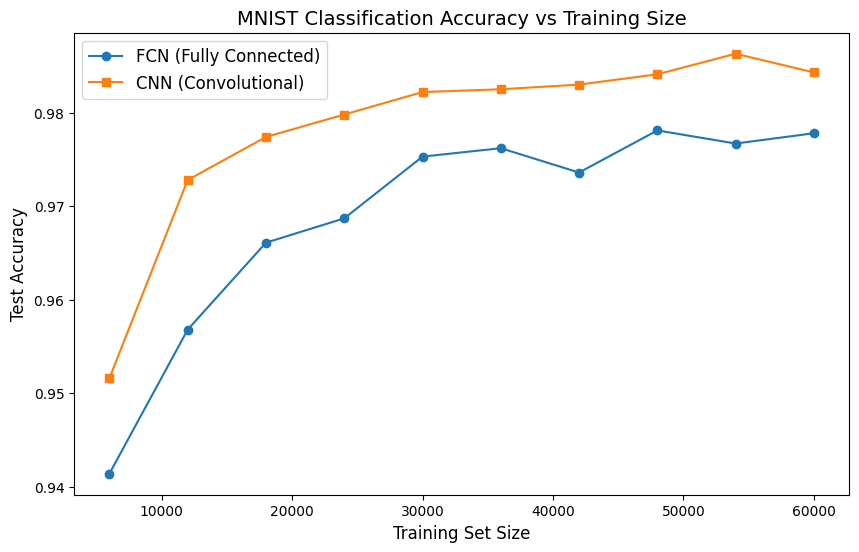

In [30]:
plt.figure(figsize=(10,6))

# Plot FCN
plt.plot(
    df["train_size"], df["fcn_test_acc"],
    marker="o", linestyle='-', color='tab:blue',
    label="FCN (Fully Connected)"
)

# Plot CNN
plt.plot(
    df["train_size"], df["cnn_test_acc"],
    marker="s", linestyle='-', color='tab:orange',
    label="CNN (Convolutional)"
)

# Labels and title
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.title("MNIST Classification Accuracy vs Training Size", fontsize=14)

# Add legend
plt.legend(fontsize=12)
plt.show()

In [37]:
# Function to determine Plateu Liklihood
def plateau(train, accuracy, threshold=0.001):
    for i in range(1, len(accuracy)):
        if accuracy[i] - accuracy[i-1] < threshold:
            return train[i]
    return train[-1]  # never plateaued, return max size

# CNN plateau
cnn_plateau = plateau(df["train_size"].values, df["cnn_test_acc"].values)
# FCN plateau
fcn_plateau = plateau(df["train_size"].values, df["fcn_test_acc"].values)

print(f"CNN plateaus at training size: {cnn_plateau}")
print(f"FCN plateaus at training size: {fcn_plateau}")


CNN plateaus at training size: 36000
FCN plateaus at training size: 36000
